<a href="https://www.kaggle.com/code/sanjilagangaju/notebooknepalearthquake?scriptVersionId=170201957" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nepal-earthquake/nepal-earthquake-severity-index-latest.csv


In [2]:
data=pd.read_csv("/kaggle/input/nepal-earthquake/nepal-earthquake-severity-index-latest.csv")
data.head()

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest


In [3]:
data.columns


Index(['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Hazard (Intensity)',
       'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity',
       'Severity Normalized', 'Severity category'],
      dtype='object')

In [4]:
rows,columns=data.shape
print("Total No.of Rows:",rows )
print("Total No.of Columns",columns)


Total No.of Rows: 3986
Total No.of Columns 12


In [5]:
data.dtypes

P_CODE                  object
VDC_NAME                object
DISTRICT                object
REGION                  object
Hazard (Intensity)     float64
Exposure               float64
Housing                float64
Poverty                float64
Vulnerability          float64
Severity               float64
Severity Normalized    float64
Severity category       object
dtype: object

In [6]:
data['Severity category'].value_counts()

Severity category
Lowest         1893
Low             800
Medium-Low      672
Medium-High     433
High            168
Highest          19
Name: count, dtype: int64

In [7]:
data.isnull().sum()

P_CODE                 1
VDC_NAME               1
DISTRICT               1
REGION                 1
Hazard (Intensity)     1
Exposure               1
Housing                1
Poverty                1
Vulnerability          1
Severity               1
Severity Normalized    1
Severity category      1
dtype: int64

In [8]:
data=data.dropna()
data.isnull().sum()

P_CODE                 0
VDC_NAME               0
DISTRICT               0
REGION                 0
Hazard (Intensity)     0
Exposure               0
Housing                0
Poverty                0
Vulnerability          0
Severity               0
Severity Normalized    0
Severity category      0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.tail()

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
3980,F-SET-69-076,Khaptad National Par,Achham,Far-Western,0.00,0.0,8.45,9.21,8.83,0.0,0.0,Lowest
3981,F-SET-70-052,Khaptad National Park,Doti,Far-Western,0.00,0.0,8.77,8.26,8.52,0.0,0.0,Lowest
3982,M-BHE-58-033,Royal Bardiya Nation,Bardiya,Mid-Western,0.00,0.0,4.64,4.82,4.73,0.0,0.0,Lowest
3983,W-LUM-48-075,Royal Chitawan Natio,Nawalparasi,Western,0.84,0.0,5.61,3.51,4.56,0.0,0.0,Lowest
3984,W-LUM-49-072,Lumbini Development,Rupandehi,Western,0.02,0.0,7.81,2.95,5.38,0.0,0.0,Lowest


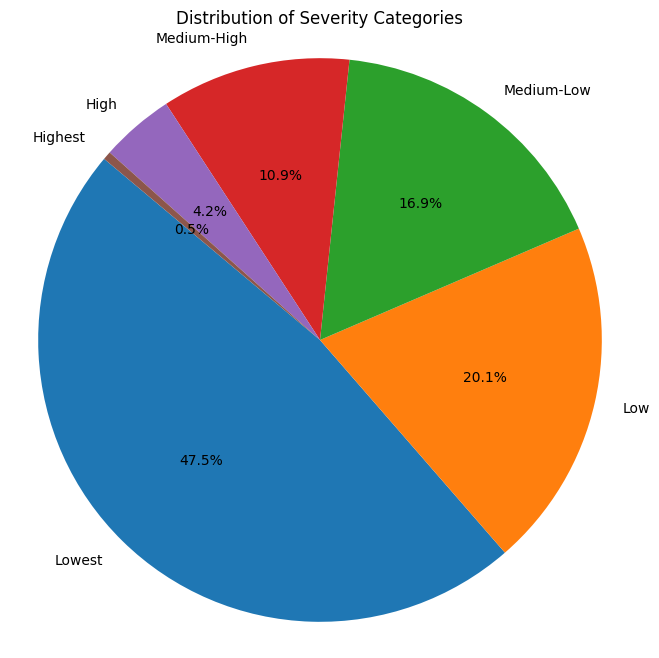

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
severity_category_counts = data['Severity category'].value_counts()
labels=severity_category_counts.index
sizes=severity_category_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('Equal')
plt.title('Distribution of Severity Categories')
plt.show()


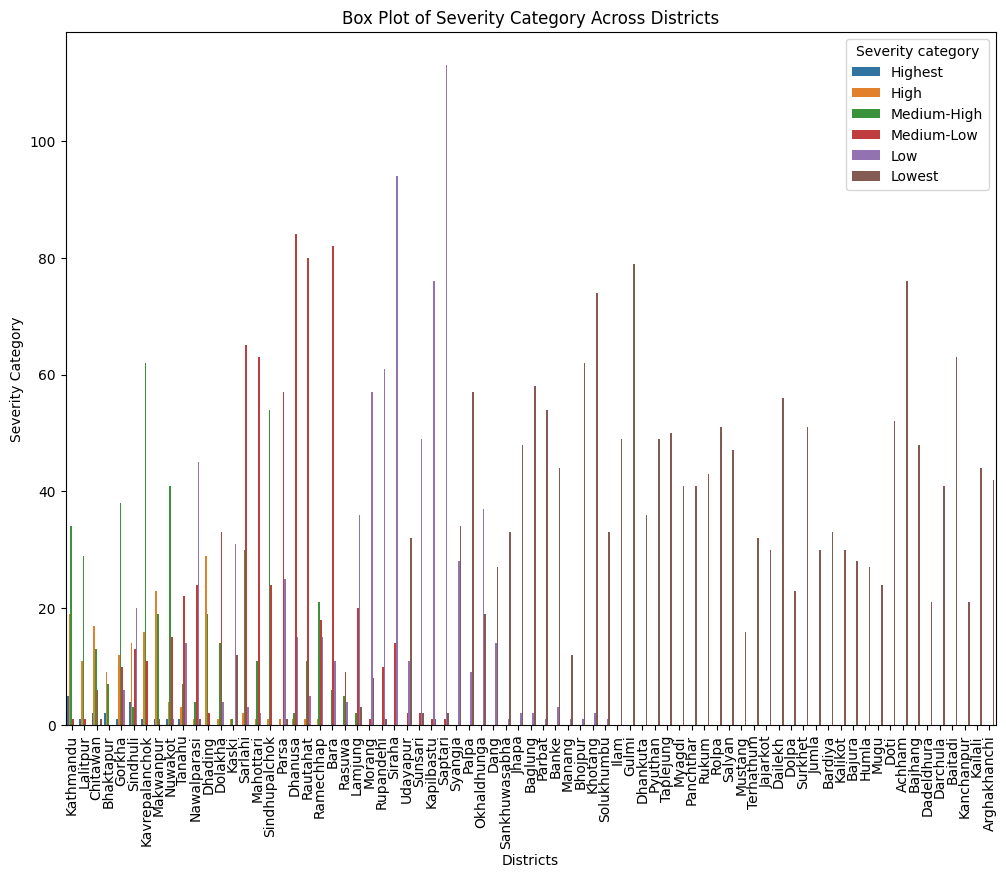

In [12]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.countplot(data=data,x='DISTRICT',hue='Severity category')
plt.xticks(rotation=90)
plt.title('Box Plot of Severity Category Across Districts')
plt.xlabel('Districts')
plt.ylabel('Severity Category')
plt.show()

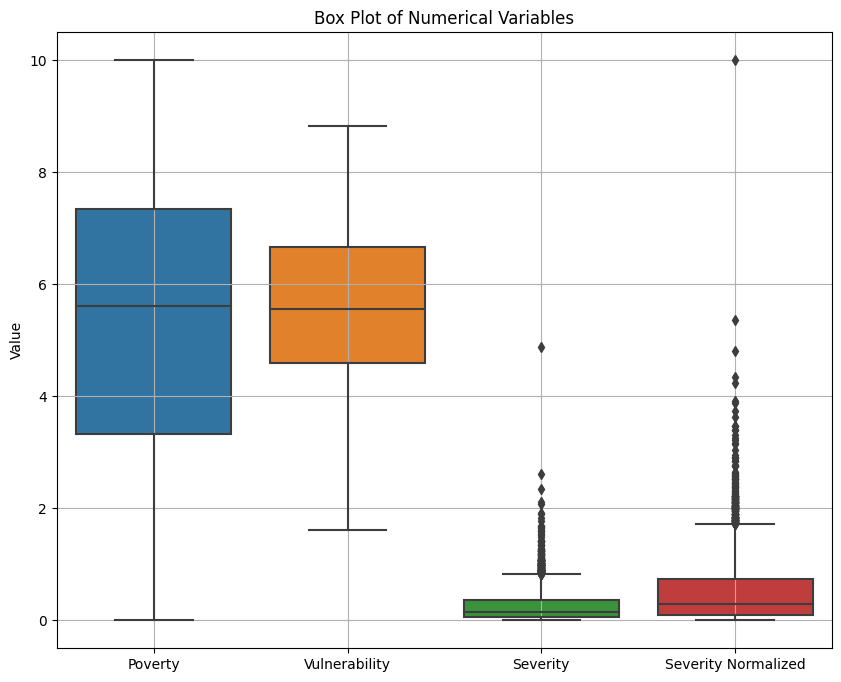

In [13]:


# Plot box plots for numerical variables
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[['Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']])
plt.title('Box Plot of Numerical Variables')
plt.ylabel('Value')
plt.grid(True)
plt.show()
   

In [14]:
corr=data[['Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']]
data1=corr.corr()

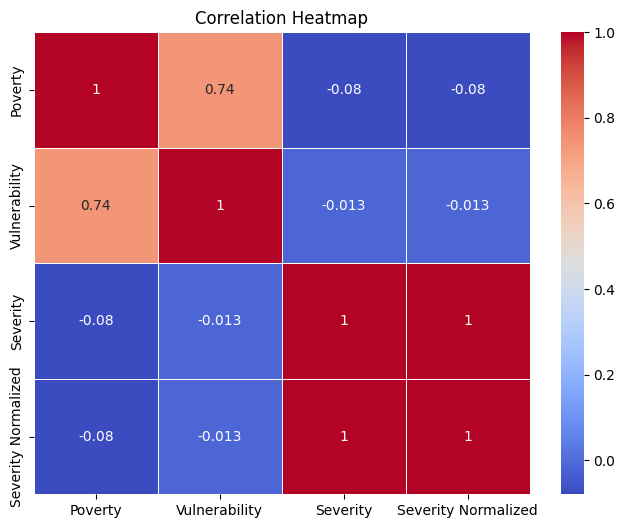

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(data1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()